In [163]:
## install
## uncomment below for installing the first time within jupyter lab notebook:
#!pip install keras
#!pip install tensorflow

In [213]:
## Set up the workbook and load the data
import numpy as np
import pandas as pd
import warnings
from collections import Counter

warnings.filterwarnings('ignore')

data_df = pd.read_csv('CellDNA.csv')
#data_df = pd.read_csv("C:\\tmp\\CellDNA.csv")
data_df.head()

,a,b,c,d,e,f,g,h,i,j,k,l,m,n
0,222,31.189189,40.342342,35.579087,8.883917,0.968325,-80.113673,222,1,16.812471,0.816176,0.578125,78.591,0
1,73,29.493151,271.397260,15.517202,6.407490,0.910764,76.042946,73,1,9.640876,0.858824,0.608333,39.217,0
2,256,58.816406,289.941406,37.226013,9.863895,0.964256,85.324742,256,1,18.054067,0.752941,0.562637,89.111,0
3,126,71.023810,477.412698,13.112980,12.790672,0.220351,63.523477,126,1,12.666025,0.881119,0.646154,43.832,0
4,225,90.808889,541.946667,44.463110,7.858879,0.984256,-52.874983,225,1,16.925688,0.728155,0.252525,90.072,7


In [214]:
## Lets explore the features
print("a # unique vals: " + str(len(data_df["a"].unique())))
print("b # unique vals: " + str(len(data_df["b"].unique())))
print("c # unique vals: " + str(len(data_df["c"].unique())))
print("d # unique vals: " + str(len(data_df["d"].unique())))
print("e # unique vals: " + str(len(data_df["e"].unique())))
print("f # unique vals: " + str(len(data_df["f"].unique())))
print("g # unique vals: " + str(len(data_df["g"].unique())))
print("h # unique vals: " + str(len(data_df["h"].unique())))
print("i # unique vals: " + str(len(data_df["i"].unique())))
print("j # unique vals: " + str(len(data_df["j"].unique())))
print("k # unique vals: " + str(len(data_df["k"].unique())))
print("l # unique vals: " + str(len(data_df["l"].unique())))
print("m # unique vals: " + str(len(data_df["m"].unique())))

## One of these values is weird, lets look at it more
print("\n" + str(len(data_df["i"].unique())) + " unique values for \"i\", I wonder what is going on?\n")

## Min/Max
print("Maximum value for i: " + str(data_df["i"].max()))
print("Minimum value for i: " + str(data_df["i"].min()))

## Distribution
i_test = list(data_df["i"])
print(Counter(i_test))

a # unique vals: 363
b # unique vals: 1186
c # unique vals: 1186
d # unique vals: 1186
e # unique vals: 1186
f # unique vals: 1186
g # unique vals: 1186
h # unique vals: 366
i # unique vals: 20
j # unique vals: 363
k # unique vals: 1067
l # unique vals: 1057
m # unique vals: 1105

20 unique values for "i", I wonder what is going on?

Maximum value for i: 1
Minimum value for i: -26
Counter({1: 1016, 0: 117, -1: 31, -2: 12, -3: 10, -4: 8, -6: 6, -7: 3, -5: 2, -11: 2, -15: 1, -12: 1, -25: 1, -14: 1, -24: 1, -26: 1, -9: 1, -18: 1, -17: 1, -21: 1})


In [215]:
## Standardize the high-cardinality features from above
from sklearn import preprocessing
stnd_scaler = preprocessing.StandardScaler()

## Standardize the column, drop the old one, replace with the new
# a
col_to_scale = data_df[["a"]].values.astype(float)
a_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "a")
data_df["a"] = a_scaled

# b
col_to_scale = data_df[["b"]].values.astype(float)
b_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "b")
data_df["b"] = b_scaled

# c
col_to_scale = data_df[["c"]].values.astype(float)
c_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "c")
data_df["c"] = c_scaled

# d
col_to_scale = data_df[["d"]].values.astype(float)
d_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "d")
data_df["d"] = d_scaled

# e
col_to_scale = data_df[["e"]].values.astype(float)
e_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "e")
data_df["e"] = e_scaled

#f
col_to_scale = data_df[["f"]].values.astype(float)
f_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "f")
data_df["f"] = f_scaled

# g
col_to_scale = data_df[["g"]].values.astype(float)
g_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "g")
data_df["g"] = g_scaled

# h
col_to_scale = data_df[["h"]].values.astype(float)
h_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "h")
data_df["h"] = h_scaled

# do nothing to i in this section

# j
col_to_scale = data_df[["j"]].values.astype(float)
j_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "j")
data_df["j"] = j_scaled

# k
col_to_scale = data_df[["k"]].values.astype(float)
k_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "k")
data_df["k"] = k_scaled

# l
col_to_scale = data_df[["l"]].values.astype(float)
l_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "l")
data_df["l"] = l_scaled

# m
col_to_scale = data_df[["m"]].values.astype(float)
m_scaled = stnd_scaler.fit_transform(col_to_scale)
data_df = data_df.drop(columns = "m")
data_df["m"] = m_scaled

# n - TARGET
# target: 0 -> 0, all else -> 1
data_df["target"] = data_df["n"].apply(lambda x: 0 if x == 0 else 1)
data_df = data_df.drop(columns = "n")
#display(data_df)

In [216]:
## OneHotEncode the remaining feature
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# i - Encode and drop one column (n - 1)
labelencoder_i = LabelEncoder()
data_df["i"] = labelencoder_i.fit_transform(data_df["i"].astype(str))
onehotencoder_i = OneHotEncoder(categorical_features=[0], sparse=False)
i_ohe = onehotencoder_i.fit_transform(data_df["i"].values.reshape(-1,1))

## Drop one element from the array (n - 1 columns kept when OHE)
i_ohe = pd.DataFrame(i_ohe[:, 1:])

## Drop the previous "i"
data_df = data_df.drop(columns = "i")

## Concatenate the original data frame and the OneHotEncoded element together
data_df = pd.concat((data_df, i_ohe), axis = 1)

print("New shape: " + str(data_df.shape))

New shape: (1217, 32)


In [217]:
## Clean-up the dataset and move the original target back to the last position in the dataframe
cols = data_df.columns.tolist()
print("current column order: " + str(cols))

## Pop "n" column and put it on the end
cols.insert(len(cols), cols.pop(cols.index('target')))

## re-index the dataframe
print("new column order: " + str(cols))
data_df = data_df.reindex(columns = cols)

current column order: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'target', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
new column order: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 'target']


In [218]:
## Split the data into X/y train/test
X = data_df.iloc[:, :-1].values
y = data_df.iloc[:, -1].values

print("X shape: " + str(X.shape))
print("y shape: " + str(y.shape))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

X shape: (1217, 31)
y shape: (1217,)


In [219]:
## Define model evaluation metrics for each keras epoch
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*  ((precision * recall) / (precision + recall + K.epsilon()))

In [ ]:
## Find the best model
import time
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

epoch = [100, 200]
batch = [20, 30, 40]
dropout = [0.0, 0.1, 0.2]
optimizer = ['rmsprop', 'adam']

max_epoch = 0
max_batch = 0
max_dropout = 0
max_optimizer = ''
max_accuracy = 0
max_precision = 0
max_recall = 0

output = []
start_time = time.time()

for e in epoch:
    for b in batch:
        for d in dropout:
            for o in optimizer:
                # below used to see progress through each parameter in real-time
                print("epoch: " + str(e) + ", batch: " + str(b) + ", dropout: " + str(d) + ", optimizer: " + str(o))
                model = Sequential()
                model.add(Dense(8, input_dim = 31, kernel_regularizer = regularizers.l2(0.01), activation = 'relu'))
                model.add(Dropout(d))
                model.add(Dense(6, activation = 'relu'))
                model.add(Dropout(d))
                model.add(Dense(1, activation = 'sigmoid'))
                model.compile(loss = 'binary_crossentropy', optimizer = o, metrics = ['accuracy', f1_m, precision_m, recall_m])
                model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = e, batch_size = b, verbose = 0)
                #model.summary()
                loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose = 0)
                output.append("epoch: " + str(e) 
                            + ", batch: " + str(b)
                            + ", dropout: " + str(d)
                            + ", accuracy: " + str(round(accuracy, 5))
                            + ", precision: " + str(round(precision, 5))
                            + ", recall: " + str(round(recall, 5)))
                scores = model.evaluate(X_test, y_test, verbose = 0)
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                    max_precision = precision
                    max_recall = recall
                    max_epoch = e
                    max_batch = b
                    max_dropout = d
                    max_optimizer = o

end_time = time.time()

print("Model Evaluation per model parameter:")
print(*output, sep = "\n")
print("\nmax accuracy: " + str(round(max_accuracy, 5)) 
          + ", precision: " + str(round(max_precision, 5)) 
          + ", recall: " + str(round(max_recall, 5)) 
          + "\nusing epoch: " + str(max_epoch) 
          + ", batch: " + str(max_batch) 
          +  ", dropout: " + str(max_dropout) 
          + ", optimizer: " + str(max_optimizer) + "\n")
print("time in seconds: " + str(end_time - start_time))

epoch: 100, batch: 20, dropout: 0.0, optimizer: rmsprop
epoch: 100, batch: 20, dropout: 0.0, optimizer: adam
epoch: 100, batch: 20, dropout: 0.1, optimizer: rmsprop
epoch: 100, batch: 20, dropout: 0.1, optimizer: adam
epoch: 100, batch: 20, dropout: 0.2, optimizer: rmsprop
epoch: 100, batch: 20, dropout: 0.2, optimizer: adam
epoch: 100, batch: 30, dropout: 0.0, optimizer: rmsprop
epoch: 100, batch: 30, dropout: 0.0, optimizer: adam
epoch: 100, batch: 30, dropout: 0.1, optimizer: rmsprop
epoch: 100, batch: 30, dropout: 0.1, optimizer: adam
epoch: 100, batch: 30, dropout: 0.2, optimizer: rmsprop
epoch: 100, batch: 30, dropout: 0.2, optimizer: adam
epoch: 100, batch: 40, dropout: 0.0, optimizer: rmsprop
epoch: 100, batch: 40, dropout: 0.0, optimizer: adam
epoch: 100, batch: 40, dropout: 0.1, optimizer: rmsprop
epoch: 100, batch: 40, dropout: 0.1, optimizer: adam
epoch: 100, batch: 40, dropout: 0.2, optimizer: rmsprop
epoch: 100, batch: 40, dropout: 0.2, optimizer: adam
epoch: 200, batch: 

In [221]:
## Use the best results from the previous section
import time
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

start_time = time.time()

print("using epoch: " + str(max_epoch) + ", batch: " + str(max_batch) 
                 + ", dropout: " + str(max_dropout)  + ", optimizer: "
                 + str(max_optimizer))

model = Sequential()
model.add(Dense(8, input_dim = 31, kernel_regularizer = regularizers.l2(0.01), activation = 'relu'))
model.add(Dropout(max_dropout))
model.add(Dense(6, activation = 'relu'))
model.add(Dropout(max_dropout))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = max_optimizer, metrics = ['accuracy', f1_m, precision_m, recall_m])
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = max_epoch, batch_size = max_batch, verbose = 0)
model.summary()

loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose = 0)
scores = model.evaluate(X_test, y_test, verbose = 0)

end_time = time.time()
print("time in seconds: " + str(end_time - start_time))

using epoch: 100, batch: 40, dropout: 0.2, optimizer: rmsprop
Model: "sequential_270"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_849 (Dense)            (None, 8)                 256       
_________________________________________________________________
dropout_421 (Dropout)        (None, 8)                 0         
_________________________________________________________________
dense_850 (Dense)            (None, 6)                 54        
_________________________________________________________________
dropout_422 (Dropout)        (None, 6)                 0         
_________________________________________________________________
dense_851 (Dense)            (None, 1)                 7         
Total params: 317
Trainable params: 317
Non-trainable params: 0
_________________________________________________________________
time in seconds: 77.78207111358643


In [222]:
## Predict
y_pred = model.predict(X_test)
y_pred = y_pred[:,0]

## Classes
y_classes = model.predict_classes(X_test)
y_classes = y_classes[:,0]

## Model Evaluation
print("accuracy: " + str(round(accuracy, 5)) + "\nrecall: " + str(round(recall, 5)) 
          + "\nprecision: " + str(round(precision, 5)) + "\nf1: " + str(round(f1_score, 5)))

## Confusion Matrix
cm = confusion_matrix(y_test, y_classes)
print("\nConfusion Matrix:")
print(cm)

accuracy: 0.91791
recall: 0.80504
precision: 0.73932
f1: 0.73728

Confusion Matrix:
[[318  18]
 [ 15  51]]


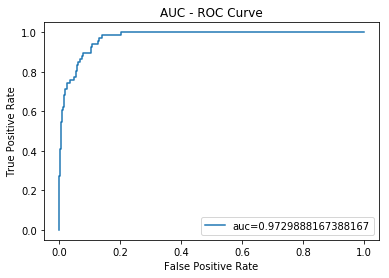

ROC AUC: 0.97299


In [223]:
## ROC/AUC
from sklearn import metrics
import matplotlib.pyplot as plt

# for printing in Jupyter
%matplotlib inline


fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "auc=" + str(auc))
plt.title("AUC - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc = 4)
plt.show()
           
print("ROC AUC: " + str(round(auc, 5)))